In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.preprocessing import MinMaxScaler
# Đọc dữ liệu từ file CSV
df = pd.read_csv('AMZN.csv')

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


# Lấy cột "Open", CLose làm biến độc lập
df = df[['Open','Close']]

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

model = DynamicFactor(train_data, k_factors=1, factor_order=2, error_order=2)
# train_data
# Fit the model
result = model.fit(method='powell', disp=False)

In [63]:
#Quá trình test
predict = result.predict(start=len(train_data), end= len(test_data)+len(train_data)-1)

In [64]:
#Quá trình validate
predict_val = result.predict(start=len(train_data)+len(test_data), end= len(test_data)+len(train_data)+len(val_data)-1)

In [73]:
#Dự đoán 30 ngày tiếp theo
predict_30_days= result.predict(start= len(test_data)+len(train_data)+len(val_data),end= len(test_data)+len(train_data)+len(val_data)+29)
print(predict_30_days)

            Open       Close
1364  163.454321  158.725460
1365  163.428686  158.690840
1366  163.403056  158.656227
1367  163.377429  158.621623
1368  163.351806  158.587027
1369  163.326188  158.552440
1370  163.300573  158.517860
1371  163.274963  158.483289
1372  163.249356  158.448727
1373  163.223753  158.414173
1374  163.198155  158.379626
1375  163.172560  158.345089
1376  163.146970  158.310559
1377  163.121383  158.276038
1378  163.095801  158.241525
1379  163.070222  158.207021
1380  163.044648  158.172525
1381  163.019077  158.138037
1382  162.993511  158.103557
1383  162.967949  158.069085
1384  162.942390  158.034622
1385  162.916836  158.000167
1386  162.891285  157.965721
1387  162.865739  157.931282
1388  162.840197  157.896852
1389  162.814658  157.862431
1390  162.789124  157.828017
1391  162.763593  157.793612
1392  162.738067  157.759215
1393  162.712545  157.724826


In [70]:
valid_rmse = np.sqrt(np.mean((predict_val - val_data)**2))
test_rmse = np.sqrt(np.mean((predict - test_data)**2))
print('Validation RMSE:', valid_rmse['Open'])
print('Testing RMSE:', test_rmse['Open'])

Validation RMSE: 68.35526460843165
Testing RMSE: 34.37297738230867


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


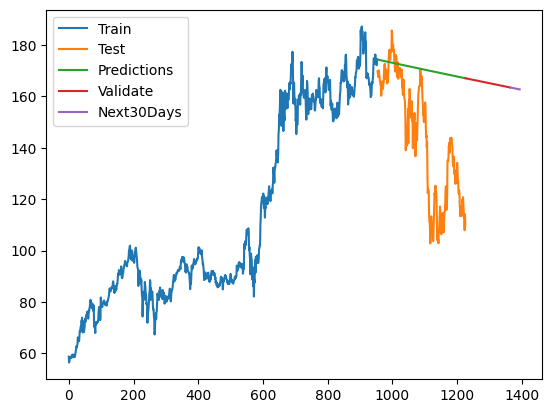

In [74]:
plt.plot(train_data.index, train_data['Open'])
plt.plot(test_data.index, test_data['Open'])
plt.plot(test_data.index, predict['Open'])
plt.plot(val_data.index, predict_val['Open'])
plt.plot(predict_30_days.index, predict_30_days['Open'])
plt.legend(['Train','Test', 'Predictions','Validate','Next30Days'])
plt.show()